<a href="https://colab.research.google.com/github/saliq-2/FashionMnist/blob/main/Copy_of_FashionMnistcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# Import data (ignore the warnings!)
fashion_mnist = datasets.FashionMNIST('data/fashion', download=True, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
print(fashion_mnist)
print(dir(fashion_mnist))
print(fashion_mnist.train_data)


100%|██████████| 26.4M/26.4M [00:01<00:00, 18.5MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 304kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.45MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.36MB/s]

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data/fashion
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )
['__add__', '__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_check_exists', '_check_legacy_exist', '_format_transform_repr', '_is_protocol', '_load_data', '_load_legacy_data', '_repr_indent', 'class_to_idx', 'classes', 'data', 'download', 'extra_repr', 'mirrors', 'processed_folder', 'raw_folder', 'resources', 'root', 'target_transf


/usr/local/lib/python3.11/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [3]:
# Target classes
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}

In [4]:
def accuracy(true_labels, predicted_labels):
    """
    Compute the classification accuracy for given labels and predictions
    :param true_labels: list of gold labels
    :param predicted_labels: list of predicted labels of same length as true_labels
    :return: a float between 0 and 1 describing how accurate the predicted labels are
    """
    accuracy = 0.0

    # YOUR CODE HERE
    true_labels = torch.tensor(true_labels)
    predicted_labels = torch.tensor(predicted_labels)

    correct = (true_labels == predicted_labels).sum().item()
    total = len(true_labels)

    accuracy = correct / total
    #raise NotImplementedError
    return accuracy

In [5]:
#cnn network arch conv-->max pool-->conv-->max pool-->fcn-->fcn

class CNNFashion(nn.Module):
  def __init__(self):
    super(CNNFashion, self).__init__()
    self.cnn_layer1=nn.Conv2d(in_channels=1,out_channels=32,kernel_size=2,stride=1)
    self.cnn_layer2=nn.Conv2d(in_channels=32,out_channels=64,kernel_size=2,stride=1)
    self.max_pool=nn.MaxPool2d(kernel_size=2,stride=2)

    #Activation Function
    self.relu=nn.ReLU()
    #Linear Layers
    self.linear1=nn.Linear(6*6*64,1028)
    self.linear2=nn.Linear(1028,512)
    self.linear3=nn.Linear(512,128)
    self.linear4=nn.Linear(128,10)

  def forward(self,x):

    x=self.max_pool(self.relu(self.cnn_layer1(x)))

    x=self.max_pool(self.relu(self.cnn_layer2(x)))

    x=x.view(x.size(0),-1)

    x=self.relu(self.linear1(x))

    x=self.relu(self.linear2(x))

    x=self.relu(self.linear3(x))

    x=self.linear4(x)

    return x





In [6]:
n_input = 784  # Fashion MNIST data input (img shape: 28*28)
n_classes = len(label_dict)  # Fashion MNIST total classes (0–9 digits)
n_samples = fashion_mnist.train_data.shape[0]  # Number of examples in training set
batch_size = 32
n_epochs = 10
summary_freq_batches = 10
learning_rate = 0.001
train_loader = torch.utils.data.DataLoader(fashion_mnist, batch_size = batch_size)

In [7]:
#Defiining the model
model=CNNFashion()
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)






Epoch 0 Training Loss--- 2.2751914637247723
Epoch 1 Training Loss--- 1.8474410091718039
Epoch 2 Training Loss--- 0.9897183358510335
Epoch 3 Training Loss--- 0.8325522655646006
Epoch 4 Training Loss--- 0.7531058550198872
Epoch 5 Training Loss--- 0.6996948992093404
Epoch 6 Training Loss--- 0.6586118539333343
Epoch 7 Training Loss--- 0.6238045982837677
Epoch 8 Training Loss--- 0.5929869932333628
Epoch 9 Training Loss--- 0.5657055218617122


/tmp/ipython-input-4-3259583533.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  true_labels = torch.tensor(true_labels)
/tmp/ipython-input-4-3259583533.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  predicted_labels = torch.tensor(predicted_labels)



Test accuracy after training of 600000 iterations: 75.65%

Test prediction: Trouser


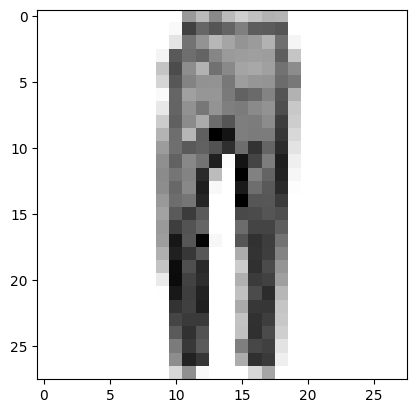

In [8]:
#TODO: initialise model, optimizer and loss function
# Training
model=CNNFashion()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)
loss_function=nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(fashion_mnist, batch_size = batch_size)
total_count = 0
for epoch_no in range(n_epochs):
    running_loss=0.0
    for batch_no, (batch_inputs, batch_labels) in enumerate(train_loader):

        total_count += batch_size
        # TODO: feed input to model, calculate loss, step with the optimizer, zero_grad
        # YOUR CODE HERE
        optimizer.zero_grad()
        outputs=model(batch_inputs)
        loss=loss_function(outputs,batch_labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()






        #raise NotImplementedError()

        #if batch_no % summary_freq_batches==0:
            # TODO: add the loss of the training batch to the training summary
            # YOUR CODE HERE
            #print(f"Epoch {epoch_no}, Batch {batch_no}, Loss: {loss.item():.4f}")

    running_loss=running_loss/len(train_loader)

    print(f'Epoch {epoch_no} Training Loss--- {running_loss}')
            #raise NotImplementedError()

# Test on the train set (do not do this in practice)

test_inputs = fashion_mnist.data.unsqueeze(1).float()  # [60000, 1, 28, 28]

test_labels = fashion_mnist.targets

test_predictions = None
# TODO: feed test inputs, fetch predictions
# YOUR CODE HERE

with torch.no_grad():
    model.eval() # Set the model to evaluation mode

    # Get model outputs (logits)
    test_outputs = model(test_inputs.float())

    # Get the predicted class by finding the index of the maximum log-probability
    # torch.max returns (values, indices), we only need the indices
    _, test_predictions = torch.max(test_outputs.data, 1)

# Compute the accuracy of the validation predictions
true_test_labels = test_labels
print("\nTest accuracy after training of {} iterations: {:.2f}%".format(total_count, accuracy(true_test_labels, test_predictions)*100))

# Random test sample
sample_no = np.random.randint(0, len(test_inputs))
print("\nTest prediction: {}".format(label_dict[test_predictions[sample_no].item()]))

plt.show()
plt.imshow(test_inputs[sample_no].reshape(28,28), cmap='Greys')
plt.show()
